In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Save the data in a DataFrame

In [174]:
solar_yield = pd.read_csv('dataset/Solar_Generation_Data.csv')

Extract the 'DATE_TIME' column from DataFrame, and convert it into a numpy array

In [175]:
date_time = solar_yield['DATE_TIME']
np_array = np.array(date_time)
d_m_y = np_array
hh_mm = np_array

Extract from numpy array only the day, month and year data time

In [176]:
count = 0
for count, np_1 in enumerate(np_array):
    d_m_y[count] = np_1.replace(np_1[10:16], '')

Convert the data into a DataFrame date time format

In [177]:
day_manth_year = pd.to_datetime(d_m_y, format='%d-%m-%Y')

Replace 'DATE_TIME' column data with date time format from above

In [178]:
solar_yield['DATE_TIME'] = day_manth_year

Print 'DATE_TIME' column to ensure that we have the right date time format

In [179]:
print(solar_yield['DATE_TIME'])

0       2020-05-15
1       2020-05-15
2       2020-05-15
3       2020-05-15
4       2020-05-15
           ...    
68773   2020-06-17
68774   2020-06-17
68775   2020-06-17
68776   2020-06-17
68777   2020-06-17
Name: DATE_TIME, Length: 68778, dtype: datetime64[ns]


Extract the data from May 15, and June 15

In [180]:
yield_15_05 = solar_yield.where((solar_yield['DATE_TIME'].dt.month == 5) & (solar_yield['DATE_TIME'].dt.day == 15))
yield_15_06 = solar_yield.where((solar_yield['DATE_TIME'].dt.month == 6) & (solar_yield['DATE_TIME'].dt.day == 15))

Get the mean values for both May 15 and June 15

In [181]:
yield_15_05_mean = yield_15_05['DAILY_YIELD'].mean()
yield_15_06_mean = yield_15_06['DAILY_YIELD'].mean()

Print the result mean yield from May 15 and June 15

In [182]:
print('\nMean yield from May 15')
print(yield_15_05_mean)
print('\nMean yield from June 15')
print(yield_15_06_mean)


Mean yield from May 15
2586.279925795714

Mean yield from June 15
3379.4663064828014


Create a DataFrame that will contain the results from above

In [183]:
data_frame = pd.DataFrame([yield_15_05_mean, yield_15_06_mean], index=['May 15', 'June 15'])

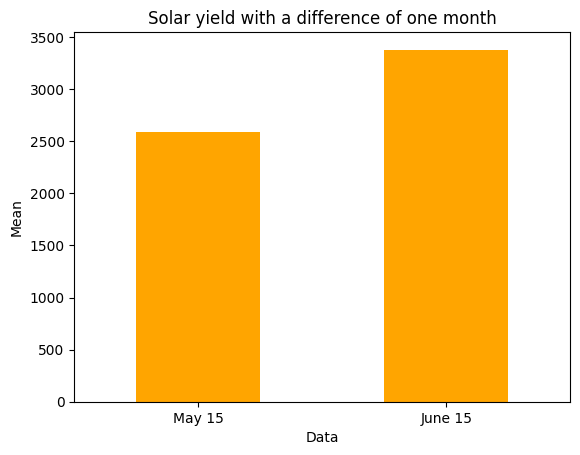

In [184]:
# cream graficul cu functia barch() din matplotlib cu culoarea orange
data_frame.plot.bar(color=['orange'])

# rotim textul de pe axa x
plt.xticks(rotation='horizontal')
# setam titlul graficului
plt.title('Solar yield with a difference of one month')
# setam un label axei x
plt.xlabel('Data')
plt.ylabel('Mean')
plt.legend().remove()
# afisam graficul
plt.show()